In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [2]:
#List of constant values.
surface_area = 0.005 
valence = 3
D_La = 4.4e13
D_Nd = 5.2e13
D_Na = 1.9e15
D_H = 1.1e16

#C_La_mem0 = eq_79_sol[0] 
#C_Nd_mem0 = eq_79_sol[1] 
#C_Na_mem0 = eq_79_sol[2]
#C_H_mem0 = eq_79_sol[3]

K_H_La = 1.49
K_H_Nd = 1.15
K_H_Na = 0.32

I = 20
F = 96485
V = 0.00125

# IVP parameters
n = 40000
tspan = np.linspace(0, n, 100)
#y0 = [eq_79_sol[0], eq_79_sol[1], eq_79_sol[2], eq_79_sol[3]]
ytest = [9.3, 2.2, 5, 1]


In [3]:
def RKG_Takahashi(z, t):
    '''
        z[0] = C_La
        z[1] = C_Nd
        z[2] = C_Na
        z[3] = C_H
        
        f1 = dC_La/dt
        f2 = dC_Nd/dt
        f3 = dC_Na/dt
        f4 = dC_H/dt
        
        ** Need to convert f5-f8 into an array**
    '''
    
    C_La_mem, C_Nd_mem, C_Na_mem, C_H_mem = z # initial values
    
    f1 = surface_area * ((valence * D_La * C_La_mem) / \
                         (valence**2 * D_La * C_La_mem + \
                          valence**2 * D_Nd * C_Nd_mem + \
                          D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
    
    f2 = surface_area * ((valence * D_Nd * C_Nd_mem) / \
                         (valence**2 * D_Nd * C_Nd_mem + \
                          valence**2 * D_La * C_La_mem + \
                          D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
    
    f3 = surface_area * ((D_Na * C_Na_mem) / (valence**2 * D_La * C_La_mem + \
                                              valence**2 * D_Nd * C_Nd_mem + \
                                              D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
    
    f4 = surface_area * ((D_H * C_H_mem) / (valence**2 * D_La * C_La_mem + \
                                            valence**2 * D_Nd * C_Nd_mem + \
                                            D_Na * C_Na_mem + D_H * C_H_mem)) * I/F * 1/-V
     
    return [f1, f2, f3, f4]

In [4]:
sol = odeint(RKG_Takahashi, ytest, tspan)
sol

array([[ 9.30000000e+00,  2.20000000e+00,  5.00000000e+00,
         1.00000000e+00],
       [ 9.28308490e+00,  2.19527183e+00,  4.87068203e+00,
         8.59239938e-01],
       [ 9.26489285e+00,  2.19018847e+00,  4.73507952e+00,
         7.29660806e-01],
       [ 9.24531859e+00,  2.18472091e+00,  4.59310273e+00,
         6.11755219e-01],
       [ 9.22425963e+00,  2.17884099e+00,  4.44478680e+00,
         5.05879940e-01],
       [ 9.20162088e+00,  2.17252269e+00,  4.29032283e+00,
         4.12207210e-01],
       [ 9.17731955e+00,  2.16574352e+00,  4.13008308e+00,
         3.30680626e-01],
       [ 9.15128976e+00,  2.15848580e+00,  3.96463479e+00,
         2.60983590e-01],
       [ 9.12348602e+00,  2.15073760e+00,  3.79473675e+00,
         2.02529616e-01],
       [ 9.09388453e+00,  2.14249313e+00,  3.62131582e+00,
         1.54480576e-01],
       [ 9.06248207e+00,  2.13375240e+00,  3.44542458e+00,
         1.15793528e-01],
       [ 9.02929236e+00,  2.12452018e+00,  3.26818624e+00,
      

Text(0.5, 1.0, 'Concentration Profile')

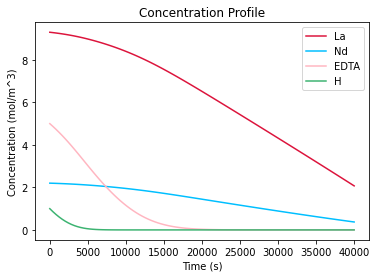

In [5]:
plt.ion()

#plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(tspan, sol[:,0], 'crimson')
plt.plot(tspan, sol[:,1], 'deepskyblue')
plt.plot(tspan, sol[:,2], 'lightpink')
plt.plot(tspan, sol[:,3], 'mediumseagreen')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/m^3)')
plt.legend(['La', 'Nd', 'EDTA', 'H'])
plt.title(('Concentration Profile'))



In [7]:
#fig, ax = plt.subplots(1, figsize=(10, 4))
#plt.suptitle('Concentration Profile')


def update(lanthanum, neodymium, edta, hydrogen, agent, lree, hree):
    
    '''
    Changes the plot according to different input parameters.
    '''

    update_sol = odeint(RKG_Takahashi, [lanthanum, neodymium, edta, hydrogen], tspan)
    
    J_La = update_sol[99][0]
    J_Nd = update_sol[99][1]

    S_La_Nd = (J_La/surface_area*V)/(J_Nd/surface_area*V)
    
    plt.rcParams['figure.figsize'] = [10, 6]
    plt.plot(tspan, update_sol[:,0], 'crimson')
    plt.plot(tspan, update_sol[:,1], 'deepskyblue')
    plt.plot(tspan, update_sol[:,2], 'lightpink')
    plt.plot(tspan, update_sol[:,3], 'mediumseagreen')
    plt.xlabel('$Time (s)$')
    plt.ylabel('$Concentration~(mol/m^3)$')
    plt.legend(['La', 'Nd', 'EDTA', 'H', 'test'], loc=1)
    plt.title(('Concentration Profile'))
    
    print("Separation Factor of La over Nd = " + "\033[3;37;40m" + str(S_La_Nd))

    return


interactive(children=(FloatSlider(value=9.3, description='$[La]$', max=50.0), FloatSlider(value=2.2, descripti…

<function __main__.update(lanthanum, neodymium, edta, hydrogen, agent, lree, hree)>

In [8]:
lanthanum = widgets.FloatSlider(value=9.3, min=0, max=50.0, description='$[La]$')
neodymium = widgets.FloatSlider(value=2.2, min=0, max=50.0, description='$[Nd]$')
edta = widgets.FloatSlider(value=5.0, min=0, max=10, description='$[EDTA]$', slidermax=neodymium)
hydrogen = widgets.FloatSlider(value=1.0, min=0, max=10, description='$[H]$')


hree = widgets.Dropdown(
        options=['Pr', 'Nd', 'Eu'],
        value='Pr',
        description='HREE')

lree = widgets.Dropdown(
        options=['La', 'Pr', 'Nd', 'Eu'],
        value='La',
        description='LREE')

agent = widgets.Dropdown(
    options=['EDTA', 'DTPA'],
    value='EDTA',
    description='Chelating Agent')

widgets.interact(update, lanthanum=lanthanum, neodymium=neodymium, edta=edta, hydrogen=hydrogen, agent=agent, hree=hree, lree=lree)

interactive(children=(FloatSlider(value=9.3, description='$[La]$', max=50.0), FloatSlider(value=2.2, descripti…

<function __main__.update(lanthanum, neodymium, edta, hydrogen, agent, lree, hree)>

In [9]:
w = widgets.Dropdown(
    options=['Addition', 'Multiplication', 'Subtraction'],
    value='Addition',
    description='Task:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)

test = widgets.HBox([widgets.Label('A too long description'), widgets.Dropdown(
    options=['EDTA', 'DTPA'],
    value='EDTA')])

display(test)

test2 = widgets.Dropdown(options=['EDTA', 'HEDTA', 'DCTA'],
    value='EDTA',
    description='Chelant:',
)

display(test2)

print(test2.value)

Dropdown(description='Task:', options=('Addition', 'Multiplication', 'Subtraction'), value='Addition')

Dropdown(description='Chelant:', options=('EDTA', 'HEDTA', 'DCTA'), value='EDTA')

EDTA
